# Beam width and depth of focus

In this example, we analyze how to measure the width of a beam in 1D, 2D. Also the depth of focus in fields_XZ using a % of the maximum

In [1]:
%matplotlib inline

In [1]:
# charges modules
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X

from diffractio.utils_math import nearest
from diffractio.utils_optics import width_percentaje

## Beam width

In [2]:
# Definition of input parameters
num_pixels = 1024*16
x0 = np.linspace(0*mm, 5*mm, num_pixels)
wavelength = 0.6238 * um

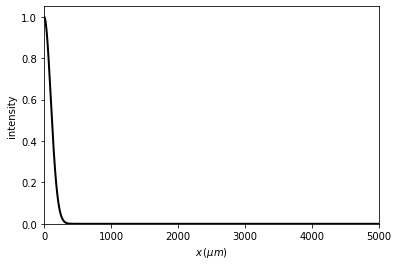

In [11]:
#Definition of mask
t1 = Scalar_source_X(x=x0, wavelength=wavelength)
t1.gauss_beam(x0=0, w0=200*um, z0=-200*um, A=1, theta=0.0)
t1.draw()

## Depth of focus using % from maximum
### development

In [4]:
width=10*um
x=np.linspace(-50*um, 50*um, 1001)
y=np.exp(-x**2/(width**2))

percentaje = np.exp(-1)

In [6]:
print(percentaje)

0.36787944117144233


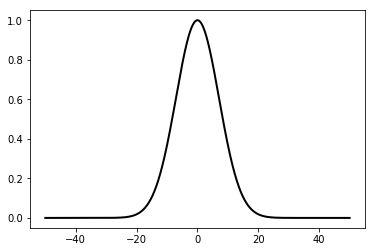

In [7]:
plt.figure()
plt.plot(x,y,'k', lw=2)

In [8]:
# Algorithm
maximum=y.max()

level=percentaje*maximum

i_max=np.argmax(y)
i_left,_,_=nearest(y[0:i_max],level)
i_right,_,_=nearest(y[i_max:-1],level)
i_right=i_right+i_max

In [9]:
i_max, i_left,i_right

(500, 400, 600)

In [10]:
width=x[i_right]-x[i_left]

In [11]:
width

20.0

### using function

In [12]:
width, x_mean =width_percentaje(x, y, percentaje=np.exp(-1), verbose=True)
print(width, x_mean)

400 500 600


ValueError: too many values to unpack (expected 2)

In [13]:
width, x_mean =width_percentaje(x, y, percentaje=0.5, verbose=True)
print(width, x_mean)

417 500 583


ValueError: too many values to unpack (expected 2)

In [14]:
width, x_mean =width_percentaje(x, y, percentaje=np.exp(-4), verbose=True)
print(width, x_mean)

300 500 700


ValueError: too many values to unpack (expected 2)

In [14]:
np.exp(-4)

0.018315638888734179